<a href="https://colab.research.google.com/github/NadhaIrshad/In22-S5-EN3160---Image-Processing-and-Machine-Vision/blob/main/Assignment_1_on_Intensity_Transformations_and_Neighborhood_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

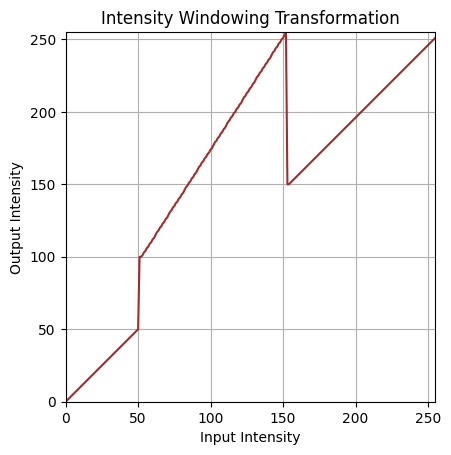

Saving emma.jpg to emma (1).jpg


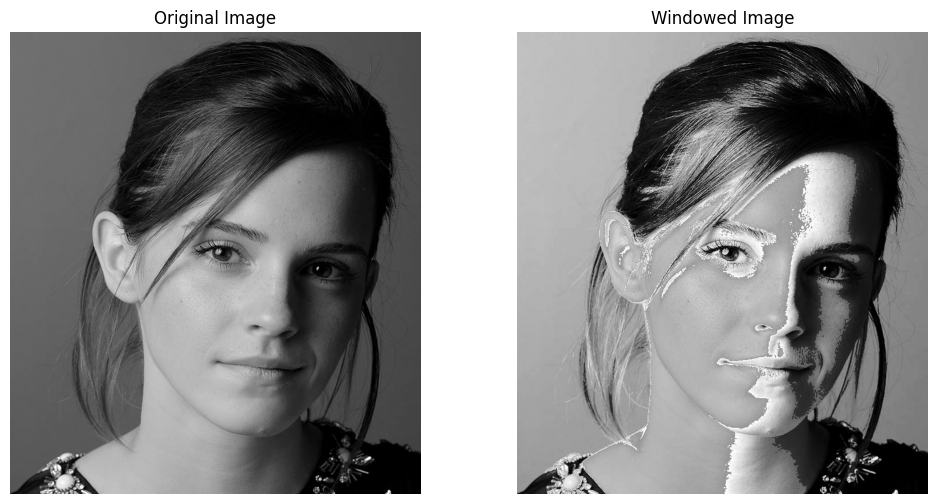

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# --- Step 1: Define control points ---
# Format: (input_intensity, output_intensity)
points = np.array([
    (0, 0),      # Start - Keep black as black
    (50, 50),    # End of first slope - Mildly bright dark pixels
    (50, 100),   # Vertical jump - make same input suddenly much brighter
    (150, 255),  # Second slope up - Increase midtones to full white
    (150, 150),  # Jump down - same input suddenly dimmer
    (255, 255)   # Final slope - Keep pure white as white
])

# --- Step 2: Build transformation function explicitly ---
# Segment 1: from (0, 0) → (50, 50)
t1 = np.linspace(points[0][1], points[1][1], points[1][0] - points[0][0] + 1).astype(np.uint8)

# Vertical jump from (50, 50) → (50, 100)
t_jump1 = np.array([points[2][1]], dtype=np.uint8)

# Segment 2: from (50, 100) → (150, 255)
t2 = np.linspace(points[2][1], points[3][1], points[3][0] - points[2][0] + 1).astype(np.uint8)

# Vertical drop from (150, 255) → (150, 150)
t_jump2 = np.array([points[4][1]], dtype=np.uint8)

# Segment 3: from (150, 150) → (255, 255)
t3 = np.linspace(points[4][1], points[5][1], points[5][0] - points[4][0] + 1).astype(np.uint8)

# Combine all segments into the LUT
transform = np.concatenate((t1, t_jump1, t2, t_jump2, t3))
transform = transform[:256]  # Ensure it's exactly length 256

# --- Step 3: Plot the transformation curve ---
fig, ax = plt.subplots()
ax.plot(transform, color='brown')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal', 'box')
ax.set_title('Intensity Windowing Transformation')
plt.grid(True)
plt.show()

# --- Step 4: Upload an image ---
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img_orig = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# --- Step 5: Apply transformation ---
img_transformed = cv.LUT(img_orig, transform)

# --- Step 6: Display results ---
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Windowed Image')
ax[1].axis('off')
plt.show()


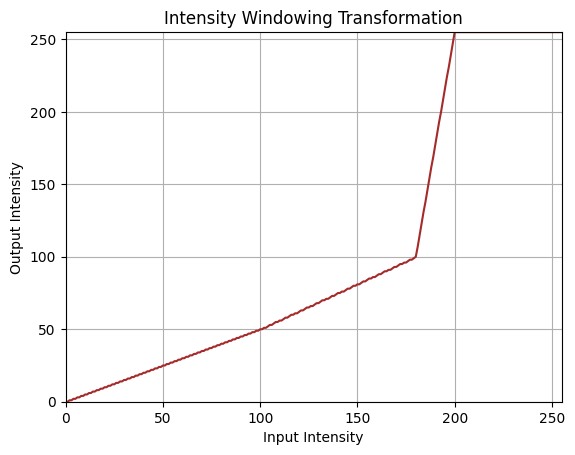

Saving brain_proton_density_slice.png to brain_proton_density_slice (2).png


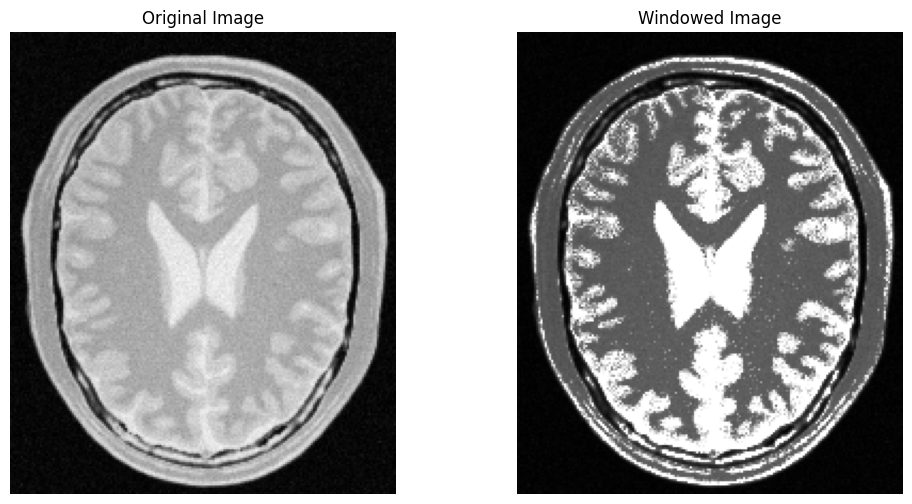

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# --- Step 1: Define control points ---
# (input_intensity, output_intensity)
points = np.array([
    (0, 0),       # Start
    (100, 50),    # Darken darker pixels
    (180, 100),   # Brighten mid-tones
    (200, 255),   # Push higher pixels to white
    (255, 255)    # Keep white as white
])

# --- Step 2: Build transformation function manually ---

# Segment 1: from (0,0) → (100,50)
t1 = np.linspace(points[0][1], points[1][1],
                 points[1][0] - points[0][0] + 1).astype(np.uint8)

# Segment 2: from (100,50) → (150,200)
t2 = np.linspace(points[1][1], points[2][1],
                 points[2][0] - points[1][0] + 1).astype(np.uint8)

# Segment 3: from (150,200) → (200,255)
t3 = np.linspace(points[2][1], points[3][1],
                 points[3][0] - points[2][0] + 1).astype(np.uint8)

# Segment 4: from (200,255) → (255,255)
t4 = np.linspace(points[3][1], points[4][1],
                 points[4][0] - points[3][0] + 1).astype(np.uint8)

# Combine into full LUT
transform = np.concatenate((t1, t2[1:], t3[1:], t4[1:]))  # avoid duplicate points
transform = transform[:256]  # ensure length is exactly 256

# --- Step 3: Plot the transformation curve ---
plt.plot(transform, color='brown')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('Intensity Windowing Transformation')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)
plt.show()

# --- Step 4: Upload image ---
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img_orig = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# --- Step 5: Apply transformation ---
img_transformed = cv.LUT(img_orig, transform)

# --- Step 6: Show results ---
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Windowed Image')
ax[1].axis('off')
plt.show()


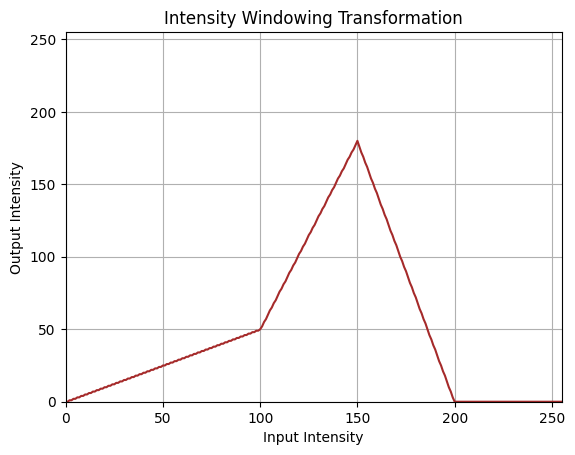

Saving brain_proton_density_slice.png to brain_proton_density_slice (5).png


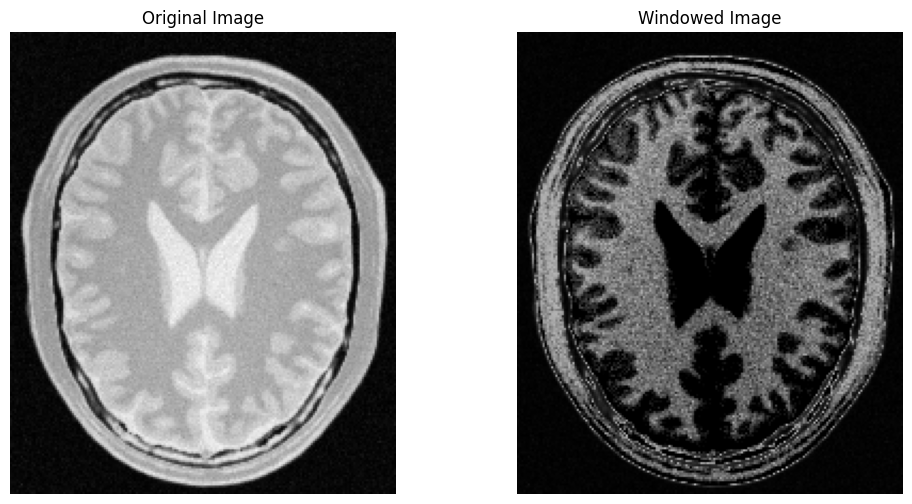

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# --- Step 1: Define control points ---
# (input_intensity, output_intensity)
points = np.array([
    (0, 0),       # Start
    (100, 50),    # Darken darker pixels
    (150, 180),   # Brighten mid-tones
    (200, 0),   # Push higher pixels to white
    (255, 0)    # Keep white as white
])

# --- Step 2: Build transformation function manually ---

# Segment 1: from (0,0) → (100,50)
t1 = np.linspace(points[0][1], points[1][1],
                 points[1][0] - points[0][0] + 1).astype(np.uint8)

# Segment 2: from (100,50) → (150,200)
t2 = np.linspace(points[1][1], points[2][1],
                 points[2][0] - points[1][0] + 1).astype(np.uint8)

# Segment 3: from (150,200) → (200,255)
t3 = np.linspace(points[2][1], points[3][1],
                 points[3][0] - points[2][0] + 1).astype(np.uint8)

# Segment 4: from (200,255) → (255,255)
t4 = np.linspace(points[3][1], points[4][1],
                 points[4][0] - points[3][0] + 1).astype(np.uint8)

# Combine into full LUT
transform = np.concatenate((t1, t2[1:], t3[1:], t4[1:]))  # avoid duplicate points
transform = transform[:256]  # ensure length is exactly 256

# --- Step 3: Plot the transformation curve ---
plt.plot(transform, color='brown')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('Intensity Windowing Transformation')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)
plt.show()

# --- Step 4: Upload image ---
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img_orig = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# --- Step 5: Apply transformation ---
img_transformed = cv.LUT(img_orig, transform)

# --- Step 6: Show results ---
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Windowed Image')
ax[1].axis('off')
plt.show()
